In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from scipy.stats import ttest_ind
from tabulate import tabulate
import random
import subprocess
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches


colors_v1 = ['#1F77B4', '#FF7F0E', '#D62728', '#2CA02C', '#535154', 'black', '#F6C85F']
colors_v2 = ['#1064A0', '#9E172A', '#FB8C0A', '#117733', '#785F51', '#909392', '#F6C85F']

colors = colors_v1

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_3599390/630898095.py:18: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [8]:
arith = ['add', 'addi', 'sub', 'lui', 'auipc']
logic = ['xor', 'xori', 'or', 'ori', 'and', 'andi']
compare = ['slt', 'slti', 'sltu', 'sltiu']
shift = ['sll', 'slli', 'srl', 'srli', 'sra', 'srai']
load = ['lb', 'lh', 'lw', 'lbu', 'lhu']
store = ['sb', 'sh', 'sw']
branch = ['beq', 'bne', 'blt', 'bge', 'bltu', 'bgeu']
jump = ['jal', 'jalr']

instruction_types = [arith, logic, compare, shift, load, store, branch, jump]
instruction_type_names = ['arith', 'logic', 'compare', 'shift', 'load', 'store', 'branch', 'jump']

In [2]:
traces = pd.read_csv("/media/SSD/paper_data/alveo/nops/10k/traces/dataset_averaged_cut.csv")

In [5]:
df = traces
branch_class_count = df[df.inst == df.loc[(df.inst.str.startswith('b'))].inst.unique()[0]].shape[0]
drop_idx = df.loc[(df.inst.str.startswith('b')) & (df.template_id >= int(3*branch_class_count/4)), 'inst'].index
df.drop(drop_idx, inplace=True)
drop_idx = df.loc[(df.inst.str.startswith('b')) & (df.template_id < int(branch_class_count/4)), 'inst'].index
df.drop(drop_idx, inplace=True)

In [9]:
df = df.drop("info", axis=1)
df = df.drop("template_id", axis=1)
df = df.reset_index(drop=True)

<Figure size 432x288 with 0 Axes>

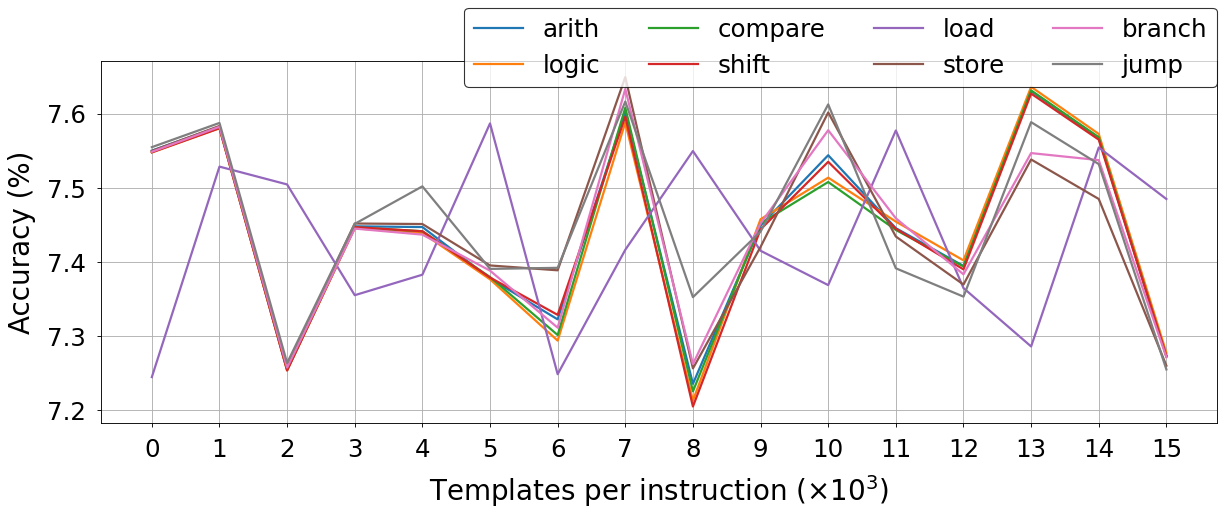

In [37]:
plt.figure()

plt.rcParams.update({'font.size': 22})
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

fig=plt.figure(figsize=(18, 6), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(1, 1, 1)

plt.ylabel('Accuracy (%)', fontsize=25, labelpad=10)
plt.xlabel('Templates per instruction ('+r'$\times 10^3$'+')', fontsize=25, labelpad=10)
plt.grid(visible=True, which='major')


for inst_type_id, inst_type in enumerate(instruction_types):
    for sensor in [15]:#range(0, 29, 5):#[2, 14, 16]:#range(0, 29):
        accuracy_curve = df[df.inst.isin(inst_type)].iloc[:, 1:].mean()[sensor*16:(sensor+1)*16]
        ax.plot(range(0, accuracy_curve.shape[0]), 
                accuracy_curve, 
                #color=colors[dataset_id], 
                linewidth='2',
                #marker="D",
                #markersize=12,
                #linestyle='dashed',
                label=instruction_type_names[inst_type_id])#"S"+str(sensor))
#minor_ticks = np.arange(45, 91, 10)
#major_ticks = np.arange(40, 91, 10)
#ax.set_yticks(major_ticks)
#ax.set_yticks(minor_ticks, minor=True)
#ax.set_ylim([40, 93])

ax.set_xticks(range(0, accuracy_curve.shape[0]), range(0, accuracy_curve.shape[0], 1));

ax.grid(which='minor', alpha=0.4)
ax.grid(which='major', alpha=1)

#plt.legend(loc='upper right', fontsize=18, ncol=7,edgecolor='black',bbox_to_anchor=(1.01, 1.14))
plt.legend(loc='upper right', fontsize=22, ncol=4,edgecolor='black',bbox_to_anchor=(1.011, 1.18))

#file_path = "/media/SSD/paper_data/plots/fig-dataset-size.pdf"
#plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

In [ ]:
# IF WE HAVE A HIERARCHICAL MODEL, RENAME CLASSES
if(hierarchical_type == 'top'):
    for inst_type_id, inst_type in enumerate(instruction_types):
        for inst in inst_type:
            df['inst'] = df['inst'].replace({inst:instruction_type_names[inst_type_id]})
elif(hierarchical_type in instruction_type_names):
    inst_index = instruction_type_names.index(hierarchical_type)
    df = df[df.inst.isin(instruction_types[inst_index])]